# EDA
### I will provide text description of what I've found during raw EDA and leave only usefull code (during analysis there was a lot more dirty code here)

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/train.csv")
df.dtypes

0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6         float64
7         float64
8           int64
9           int64
10          int64
11          int64
12          int64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>],
       [<Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
        <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>],
       [<Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>,
        <Axes: title={'center': '23'}>, <Axes: title={'center': '24'}>,
        <Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes: title={'

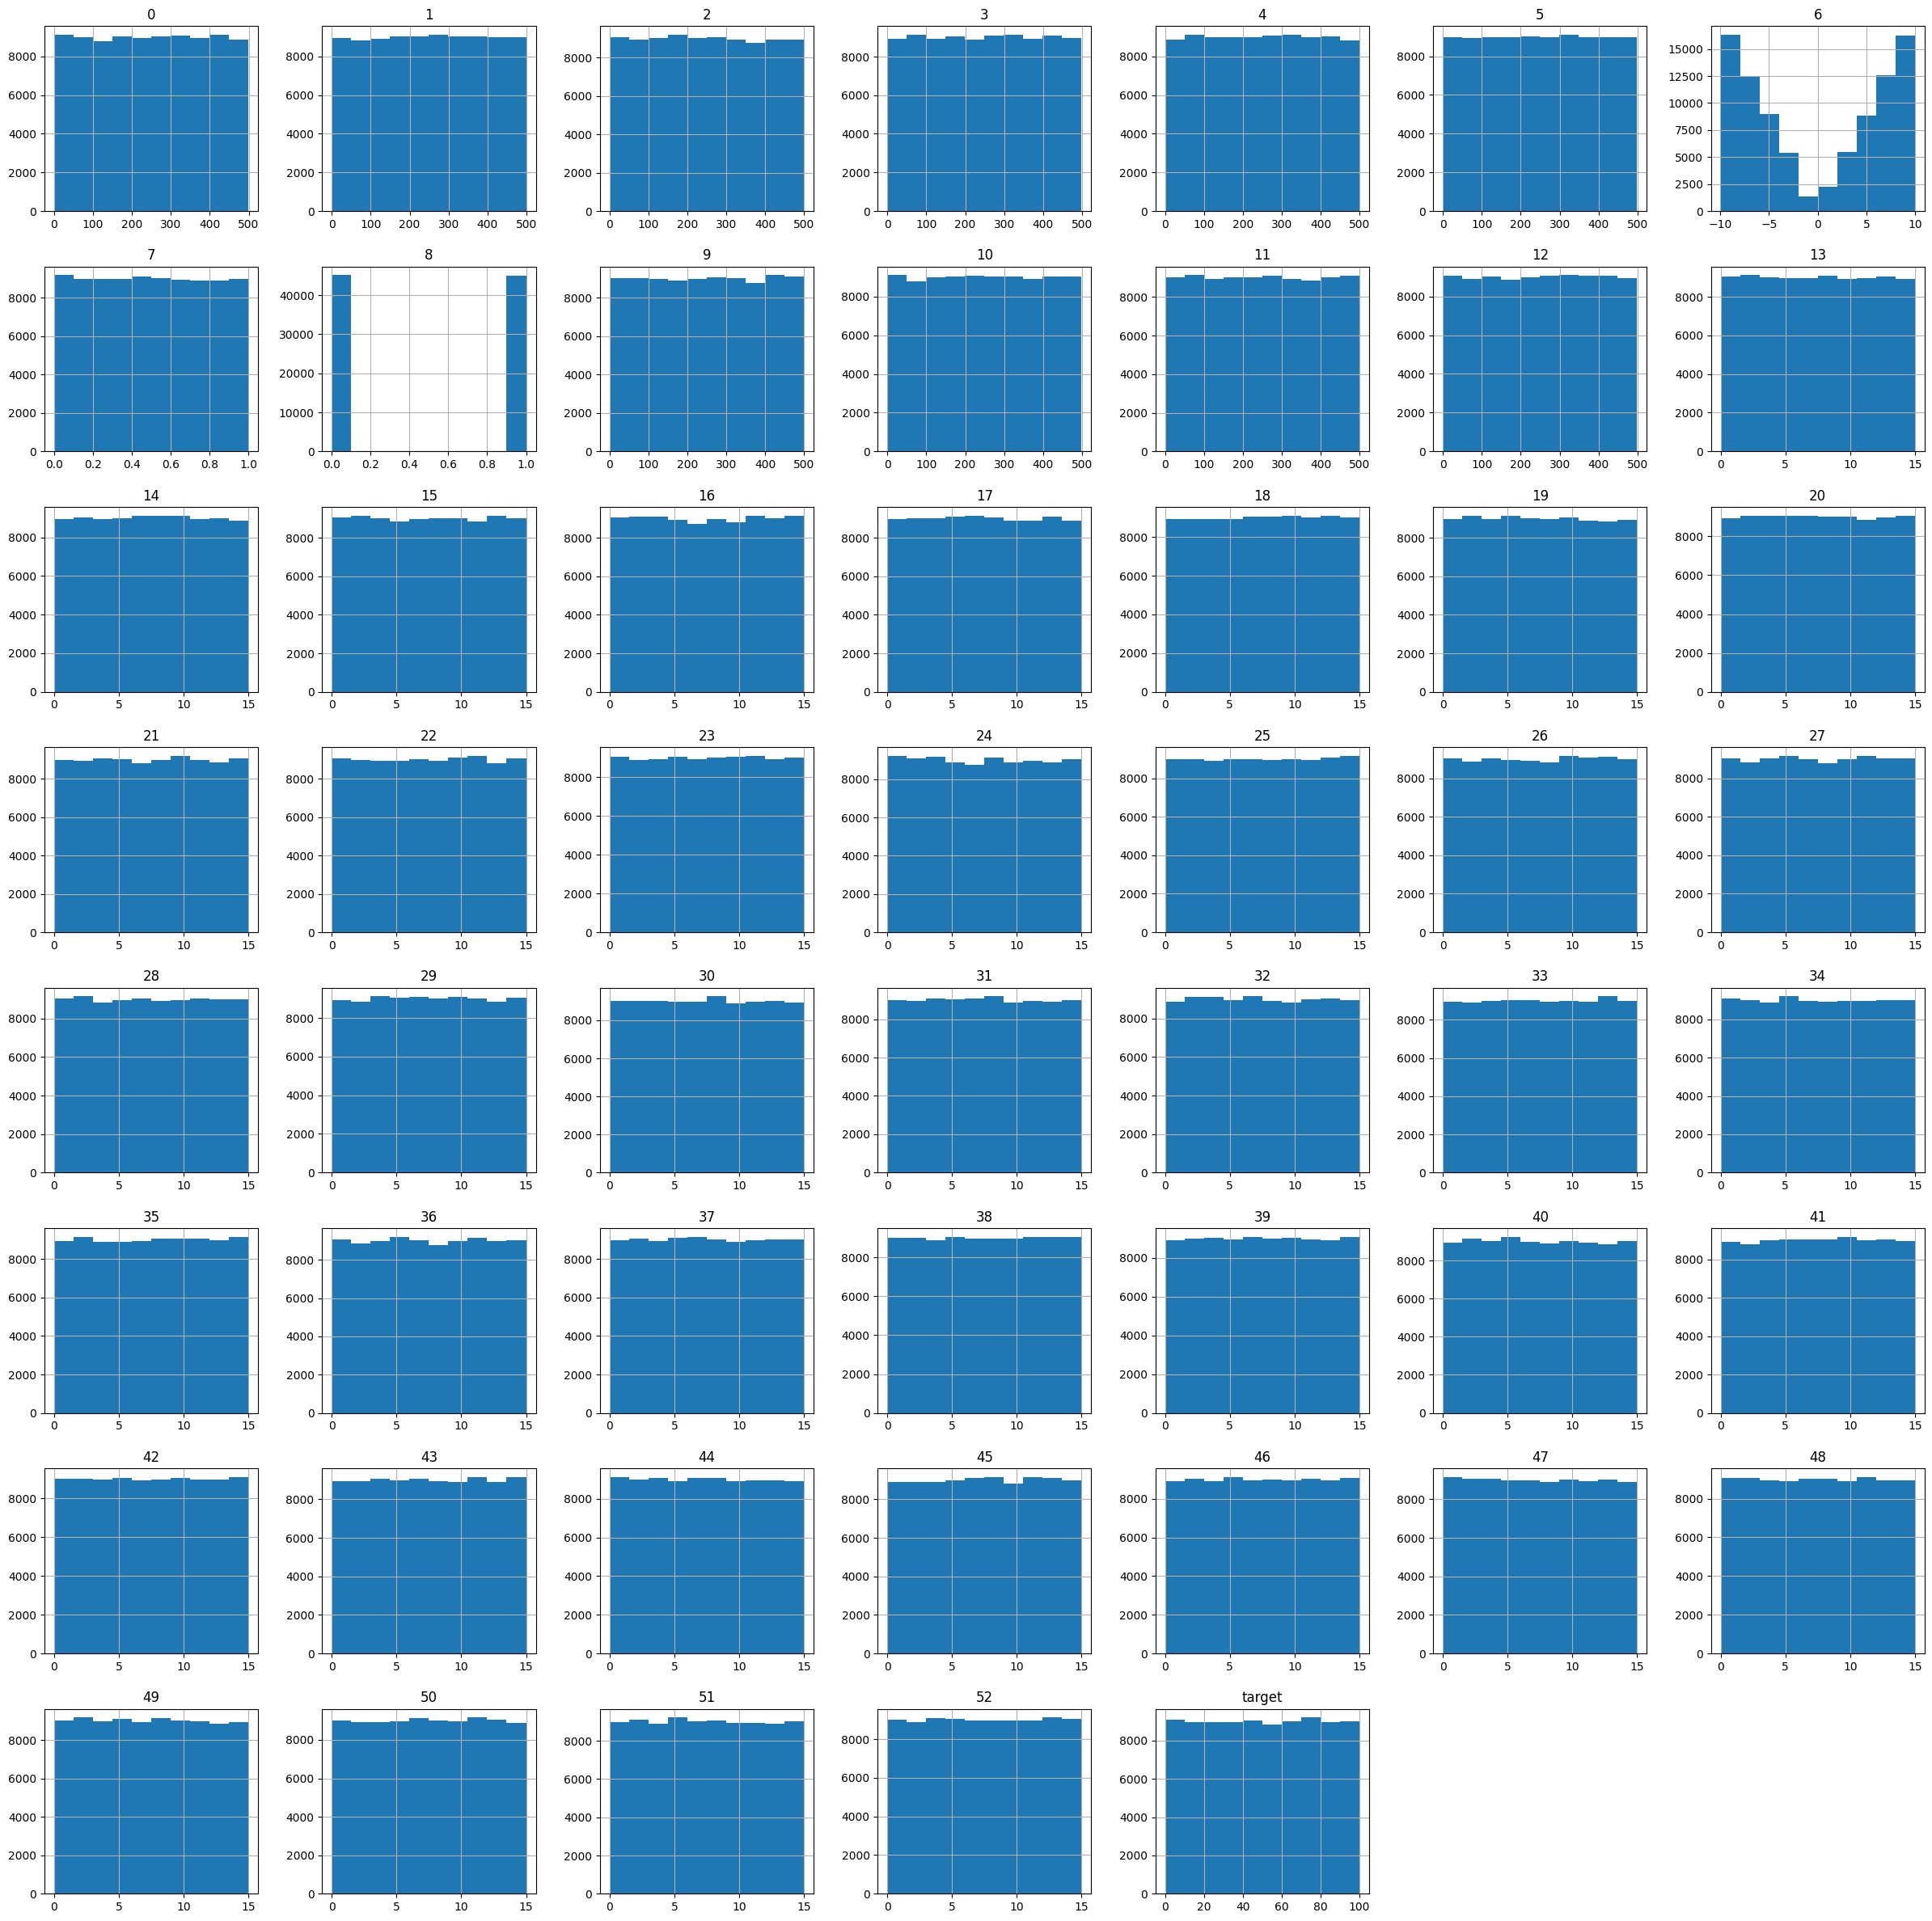

In [5]:
df.hist(figsize=(30, 30))

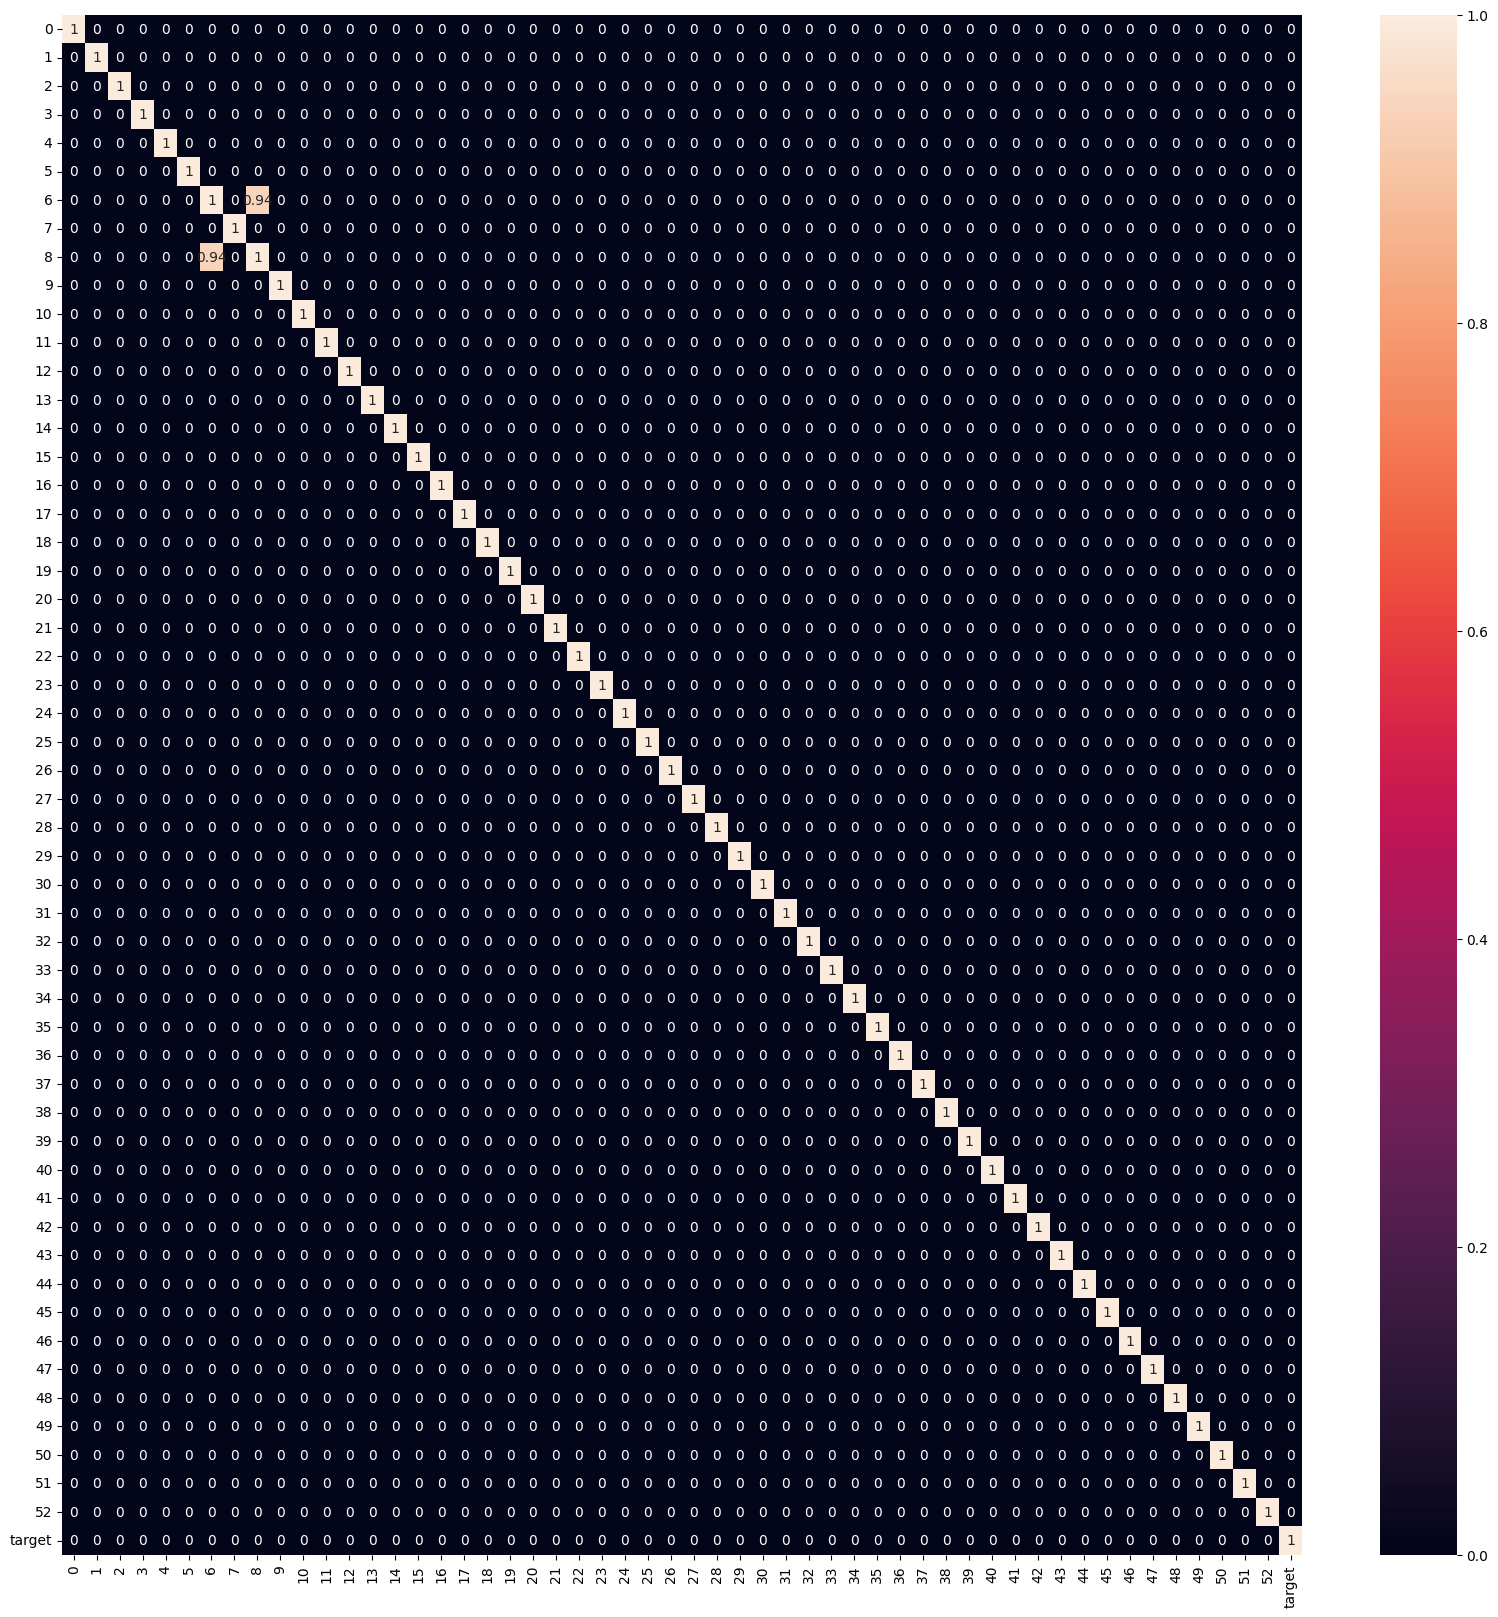

In [6]:
corr = df.corr()
corr[(corr > -0.1) & (corr < 0.1)] = 0
plt.figure(figsize = (20,20))
sn.heatmap(corr, annot=True)
plt.show()

# First insights:
It seems that only distributions of features __6__ and __8__ are different from others and these 2 features are highly positively correlated (even if 8 is categorical while 6 is numerical). Also, it is very strange that every other feature is distributed like "uniform distribution" and none correlate with each other or target. I also noticed that statistics from df.describe() of some feature groups are very similar. Firstly I decided to look deeper into features 6 and 8 

In [7]:
df[["6", "8"]].head(20)

,6,8
0,-4.472136,0
1,7.810250,1
2,8.602325,1
3,8.306624,1
4,8.124038,1
5,5.830952,1
6,-1.414214,0
7,-6.324555,0
8,-8.602325,0
9,8.774964,1


### Strange similarity of features 6 and 8
After a detailed inspection of features 6 and 8 and their statistics from df.describe() I thought that both of these features are binary categorical features. It seemed to me that feature 6 is somehow modified feature 8. Firstly I tried to make feature 6 binary by a simple threshold like 0 but was not able to receive the same value_counts of these features.

In [8]:
new_8_feature = df["6"].copy()
new_8_feature[new_8_feature >= 0] = 1
new_8_feature[new_8_feature < 0] = 0
print(df["6"][new_8_feature != df["8"]].value_counts())

new_8_feature = df["6"].copy()
new_8_feature[new_8_feature > 0] = 1
new_8_feature[new_8_feature <= 0] = 0
print(df["6"][new_8_feature != df["8"]].value_counts())

6
-0.0    435
Name: count, dtype: int64
6
0.0    468
Name: count, dtype: int64



The difference was only in the negative/positive zeros. I started to look dipper and understood that I could convert feature 6 exactly to feature 8 by thresholding based on the value sign.

In [9]:
def custom_treshold(v):
    signed_one = math.copysign(1, v)
    return int(signed_one > 0)
new_8_feature = df["6"].copy().apply(custom_treshold)
print(df["6"][new_8_feature != df["8"]].value_counts())

Series([], Name: count, dtype: int64)


I was right that they are connected somehow but I was wrong about the way of their connection. I discovered it later - but feature 8 represents the sign of feature 6 values where __1__ means positive and __0__ - negative.

# Baseline
#### I was not able to get any insights from anonymized features and I decided to train some baseline regressors to see if they can give some insights about the features.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [11]:
def prepare_data(df, numerical_features=None, categorical_features=["8"], use_scaler=True):      
    y = df["target"]
    # drop target and categorical features
    X = df.drop(["target"] + categorical_features, axis=1)
    
    if numerical_features is not None:
        X = X[numerical_features]
    feature_names = list(X.columns)
    
    scaler = None
    if use_scaler:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    # return categorical feature to train data
    X = np.column_stack((X, df[categorical_features].values))
    feature_names += categorical_features
    feature_names = [f"_{f_name}" for f_name in feature_names]
    return X, y, scaler, feature_names

In [12]:
X, y, scaler, feature_names = prepare_data(df)

In [13]:
def train_regressor(regressor, X, y):
    regressor.fit(X, y)
    
    print(f"Regressor score: {regressor.score(X, y)}")
    
    y_pred = regressor.predict(X)
    print(f"MSE on train data: {mean_squared_error(y, y_pred)}")

In [14]:
linear_regr = LinearRegression()
train_regressor(linear_regr, X, y)

Regressor score: 0.000631210379404723
MSE on train data: 834.5142701011946


##### Linear Regressor was not able to learn anything from raw features. I thought that maybe there is non linear dependency between features and target

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
non_linear_regr = GradientBoostingRegressor(n_estimators=50, verbose=True)
train_regressor(non_linear_regr, X, y)

      Iter       Train Loss   Remaining Time 
         1         697.1624            1.59m
         2         582.0500            1.53m
         3         485.8577            1.47m
         4         406.1524            1.42m
         5         339.9907            1.43m
         6         284.4506            1.43m
         7         238.0912            1.43m
         8         199.6959            1.39m
         9         167.7071            1.46m
        10         140.9849            1.42m
        20          26.7174            1.01m
        30           5.7162           38.42s
        40           1.3692           19.53s
        50           0.6526            0.00s
Regressor score: 0.9992185178049973
MSE on train data: 0.6525699524871191


In [17]:
non_linear_regr.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.99944219e-01, 5.57813662e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

##### Non-linear regressor was able to learn something. It seems that features 6 and 7 are the most impactful for the model decision. Since there are not so many features I decided to try to find this non-linear dependency of the target from feature 6 and possibly others.

In [18]:
df[["6", "7", "target"]]

,6,7,target
0,-4.472136,0.107472,20.107472
1,7.810250,0.763713,61.763713
2,8.602325,0.651162,74.651162
3,8.306624,0.424645,69.424645
4,8.124038,0.767304,66.767304
...,...,...,...
89995,4.898979,0.563878,24.563878
89996,-3.605551,0.861690,13.861690
89997,6.164414,0.633704,38.633704
89998,-3.605551,0.687309,13.687309


#### Looking into these features I found that feature 7 is equal to the fractional part of the target and I thought that any scaler would affect its precision. So I decided to train the model only with features 6 and 7 without any scaler.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

X, y, _, feature_names = prepare_data(df, numerical_features=["6", "7"], categorical_features=[], use_scaler=False)

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
linear_regr = LinearRegression() 
train_regressor(linear_regr, X_poly, y)

Regressor score: 1.0
MSE on train data: 2.3038852208490887e-28


In [20]:
def print_regressor_best_weights(regressor, weights_names, num_features=5):
    weights = regressor.coef_.copy()
    
    sort_indices = weights.argsort()
    
    print("Five most impactful positive features and its weights:")
    print(weights_names[sort_indices][-num_features:][::-1])
    print(weights[sort_indices][-num_features:][::-1])
    print("\nFive most impactful negative features and its weights:")
    print(weights_names[sort_indices][:num_features])
    print(weights[sort_indices][:num_features])

weights_names = poly.get_feature_names_out(feature_names)
print_regressor_best_weights(linear_regr, weights_names)

Five most impactful positive features and its weights:
['_6^2' '_7' '_7^2' '_6' '1']
[1.00000000e+00 1.00000000e+00 1.55934293e-14 6.66133815e-16
 0.00000000e+00]

Five most impactful negative features and its weights:
['_6 _7' '1' '_6' '_7^2' '_7']
[-1.40512602e-16  0.00000000e+00  6.66133815e-16  1.55934293e-14
  1.00000000e+00]


##### I found that 6^2 and 7 are the most important features of this well-learned linear model. After some time I understood that __target__ can be calculated by a simple formula: feature_6^2 + feature_7. So, it seems to me, that this dataset is synthetic and probably doesn't mean anything. 

In [21]:
calculated_target = df["6"] ** 2 + df["7"]
actual_target = df["target"]
mean_squared_error(actual_target, calculated_target)

9.384087621158252e-29

We can plot dependency of the target on the feature 6 to see if its quadratic. 

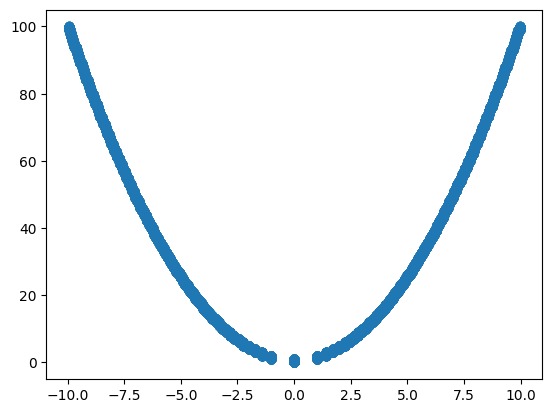

In [22]:
plt.scatter(df["6"], df["target"])